# Perceptron

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
# Load the iris dataset
iris = datasets.load_iris()
# Create our X and y data
X1 = iris.data
y1 = iris.target
X = X1[50:150,2:4]
y = np.where(y1[50:150] == 2, -1, y1[50:150])
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=1)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print('Training dataset:', X_train.shape[0])
print('Testing dataset:', X_test.shape[0])
print('Class labels:' , np.unique(y))

Training dataset: 70
Testing dataset: 30
Class labels: [-1  1]


Misclassified samples: 4
Accuracy: 0.8666666666666667


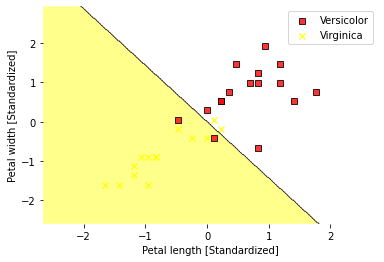

In [7]:
# training
ppn = Perceptron(eta0=0.1, max_iter=40)
ppn.fit(X_train_std, y_train)
# testing
y_pred = ppn.predict(X_test_std)
print('Misclassified samples:', (y_test != y_pred).sum())
print('Accuracy:',accuracy_score(y_test, y_pred))
# plot descision boundary
X_combined_std = np.vstack(( X_test_std))
y_combined = np.hstack(( y_test))
ax = plot_decision_regions(X=X_combined_std, y=y_combined,
 clf=ppn,markers ={'x','s'},colors=('red,yellow'))
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['Versicolor', 'Virginica'])
plt.show()